# Forecast Model of Internet Searches with Prophet

In [1]:
import os

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from prophet import Prophet

In [3]:
# Some internal calls in plotting functions result in future warnings
# These warnings will be suppressed for a cleaner notebook
import warnings
warnings.simplefilter("ignore", category=FutureWarning)

# Functions & Classes

In [4]:
def check_directory_name(target_name):
    """
    Check if the current directory name matches the target_name.
    If not, move up a directory and repeat the check.
    
    Args:
        target_name (str): The directory name to match.
        
    Returns:
        bool: True if the current directory name matches the target_name, False otherwise.
    """
    # Get the current directory path
    current_dir = os.getcwd()
    
    # Extract the directory name from the path
    current_dir_name = os.path.basename(current_dir)
    
    # Check if the current directory name matches the target_name
    if current_dir_name == target_name:
        print(f'Directory set to {current_dir}, matches target dir sting {target_name}.')
        return True
    else:
        # Move up a directory
        os.chdir('..')
        # Check if we have reached the root directory
        if os.getcwd() == current_dir:
            return False
        # Recursively call the function to check the parent directory
        return check_directory_name(target_name)

In [5]:
class LanguageForecast(object):
    ''' Class for handling Prophet Forecast Analysis

    Note: predictions based on periods and freq
        these attributes default to 52 and 'W' (weeks) for a year of predictions
        be sure to set these as desired for other interval predictions
    
    Attributes
    ----------
    language_col : str
        column name from df containing count data to model
    datetime_col : str
        column name from df with time series data in datetime format
    df : pd.DataFrame()
        df containing language_col, datetime_col
        may contain additional cols which will not be used in analysis
    prepped_df : pd.DataFrame()
        df generated from input df with only select columns
        column names are mapped to expected names for Prophet input
        created by prep_data method
    m : Prophet()
        Prophet model for analysis with fit and predict methods
    periods : int
        number of future time points to predict
    freq : str
        frquency of predictions
        'W": week, 'D': day, 'Y': year, 'MS': month start & 'ME': month end
    future_df : pd.DataFrame()
        df of datetimes based on periods and freq used when predicting
    forecast_df : pd.DataFrame()
        df that holds prediction results

    Methods
    -------
    prep_data()
        parses and renames data cols for Prophpet analysis
    fit_prophet()
        fits prophet model
    predict_prophet()
        runs predict step based on periods and freq
        results df is stored as forecast_df
    '''
    
    def __init__(self, language_col, datetime_col, df):
        self.language_col = language_col
        self.datetime_col = datetime_col
        self.df = df
        self.prepped_df = None
        self.m = Prophet()
        self.periods = 52
        self.freq = 'W'
        self.future_df = None
        self.forecast_df = None

    def prep_data(self):
        """ Prophet model expects two columns: ds for datetimes and y for data to model
        df with just that data created
        """
        prepped_df = self.df[[self.datetime_col, self.language_col]]
        self.prepped_df = prepped_df.rename(columns={self.datetime_col: 'ds', self.language_col: 'y'})

    def fit_prophet(self):
        """ runs fit method on selected data with Prophet """
        self.m.fit(self.prepped_df)

    def predict_prophet(self):
        ''' generates a df with datetimes to predict on
        predicts with Prophet, returning results in a df
        '''
        self.future_df = self.m.make_future_dataframe(periods=self.periods, freq=self.freq)
        self.forecast_df = self.m.predict(self.future_df)
        print(f'Shape of forecast df is {self.forecast_df.shape}.')
        print(f'Tail of forecast data for {self.language_col}.\n')
        print(f'Forecast was for {self.periods} periods of {self.freq} frequency.\n')
        print(self.forecast_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
        print(f'\n\n')
    
    def run_analysis(self):
        """ wrapper method for running main analysis steps in sequence """
        self.prep_data()
        self.fit_prophet()
        self.predict_prophet()
        

# Data Import and Basic EDA

In [6]:
# Make sure cwd is set to repo base dir so all imports work
# base_dir should be a str of the repo name
base_dir = "ProgrammingLanguageTrends"
if check_directory_name(base_dir):
    print("Working directory is set.")
else:
    print("Current directory does not match the target name or its parent directory is the root.")

Directory set to /Users/dsl/Documents/GitHub/ProgrammingLanguageTrends, matches target dir sting ProgrammingLanguageTrends.
Working directory is set.


In [7]:
# Read data into pandas df
# NOTE: Data must be extracted from archive.zip and renamed data.csv
df = pd.read_csv('data/data.csv')

In [8]:
df.head()

Week  Python  Java  C++
0  4/21/2019      55    55   18
1  4/28/2019      52    50   16
2   5/5/2019      56    56   17
3  5/12/2019      56    61   18
4  5/19/2019      57    56   17

In [9]:
# Create new col WeekDt as datetime
df['WeekDt'] = pd.to_datetime(df['Week'])

In [10]:
df.head()

Week  Python  Java  C++     WeekDt
0  4/21/2019      55    55   18 2019-04-21
1  4/28/2019      52    50   16 2019-04-28
2   5/5/2019      56    56   17 2019-05-05
3  5/12/2019      56    61   18 2019-05-12
4  5/19/2019      57    56   17 2019-05-19

In [11]:
# Assign datetime column as WeekDt
dt_col = 'WeekDt'

In [12]:
# Create list of data columns
lang_cols = ['Python', 'Java', 'C++']

## Prophet Forecasts

In [13]:
lang_models = []

In [14]:
for lc in lang_cols:
    lf = LanguageForecast(language_col=lc, datetime_col='WeekDt', df=df)
    lf.run_analysis()
    lang_models.append(lf)
print(f'Number of data models is: {len(lang_models)}.')

10:45:00 - cmdstanpy - INFO - Chain [1] start processing
10:45:00 - cmdstanpy - INFO - Chain [1] done processing
10:45:00 - cmdstanpy - INFO - Chain [1] start processing
10:45:00 - cmdstanpy - INFO - Chain [1] done processing
10:45:00 - cmdstanpy - INFO - Chain [1] start processing
10:45:00 - cmdstanpy - INFO - Chain [1] done processing


Shape of forecast df is (314, 16).
Tail of forecast data for Python.

Forecast was for 52 periods of W frequency.

            ds       yhat  yhat_lower  yhat_upper
309 2025-03-23  74.711841   66.029436   83.953941
310 2025-03-30  74.880654   65.816736   83.874976
311 2025-04-06  73.448423   63.773139   83.583091
312 2025-04-13  70.869580   61.419909   80.482708
313 2025-04-20  68.585382   59.491044   78.072446



Shape of forecast df is (314, 16).
Tail of forecast data for Java.

Forecast was for 52 periods of W frequency.

            ds       yhat  yhat_lower  yhat_upper
309 2025-03-23  41.218942   35.795865   46.647554
310 2025-03-30  41.403904   36.152916   46.391099
311 2025-04-06  40.872771   35.112460   46.602638
312 2025-04-13  39.378085   33.821022   44.933491
313 2025-04-20  37.712874   32.183981   43.466059



Shape of forecast df is (314, 16).
Tail of forecast data for C++.

Forecast was for 52 periods of W frequency.

            ds       yhat  yhat_lower  yhat_upper
309 

In [15]:
for lm in lang_models:
    print(lm.language_col)

Python
Java
C++


In [19]:
# m = Prophet()
# m.fit(test_df)

NameError: name 'test_df' is not defined

In [17]:
# future = m.make_future_dataframe(periods=52, freq='W')
# future.tail()

# forecast = m.predict(future)
# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds
309 2025-03-23
310 2025-03-30
311 2025-04-06
312 2025-04-13
313 2025-04-20

ds       yhat  yhat_lower  yhat_upper
309 2025-03-23  74.711841   65.332075   84.008792
310 2025-03-30  74.880654   65.744006   84.789133
311 2025-04-06  73.448423   64.149458   82.768012
312 2025-04-13  70.869580   62.391905   80.881448
313 2025-04-20  68.585382   59.738975   78.431432

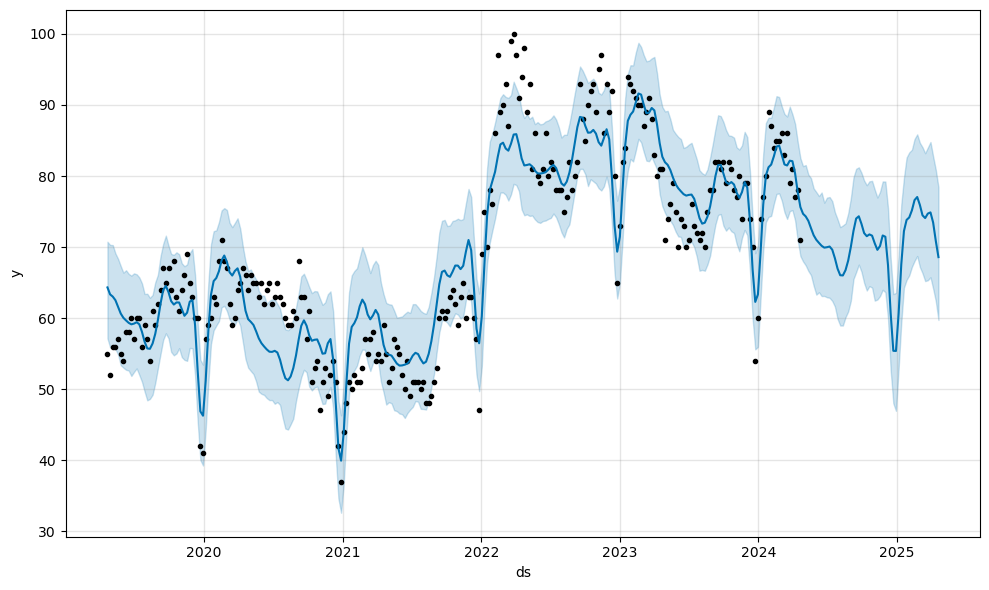

In [19]:
fig1 = m.plot(forecast)

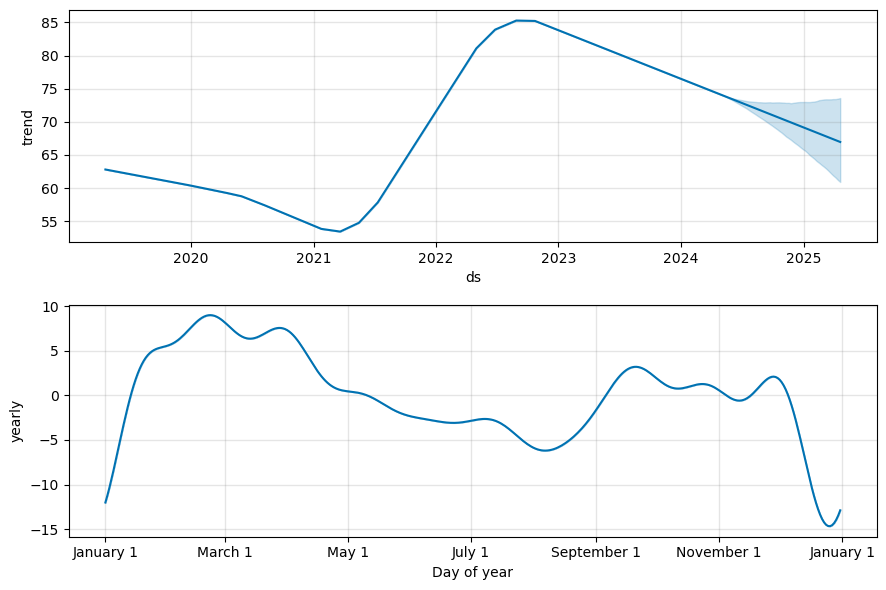

In [20]:
fig2 = m.plot_components(forecast)

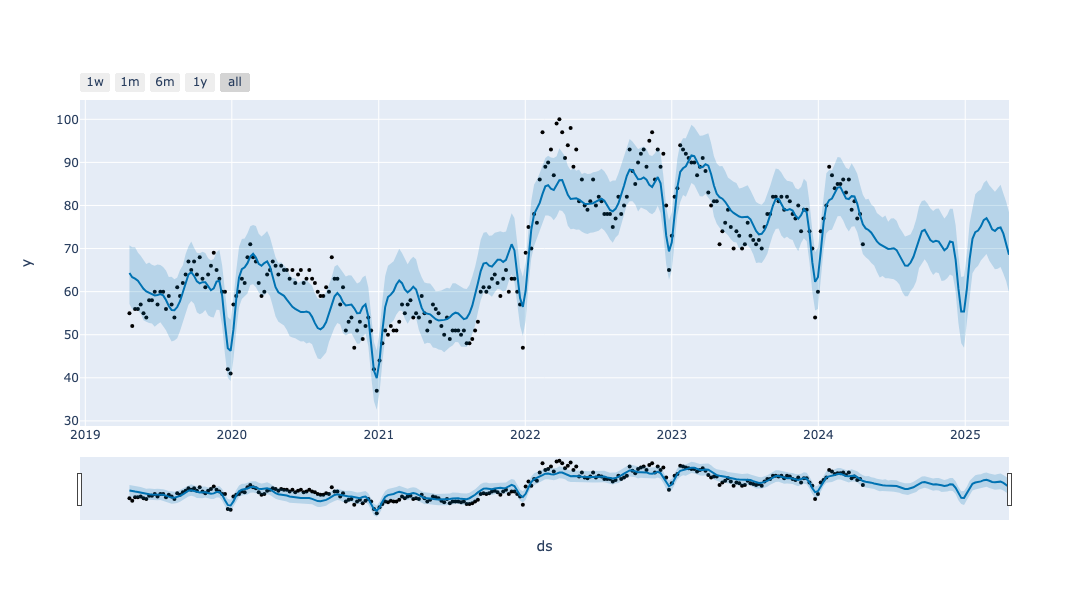

In [21]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

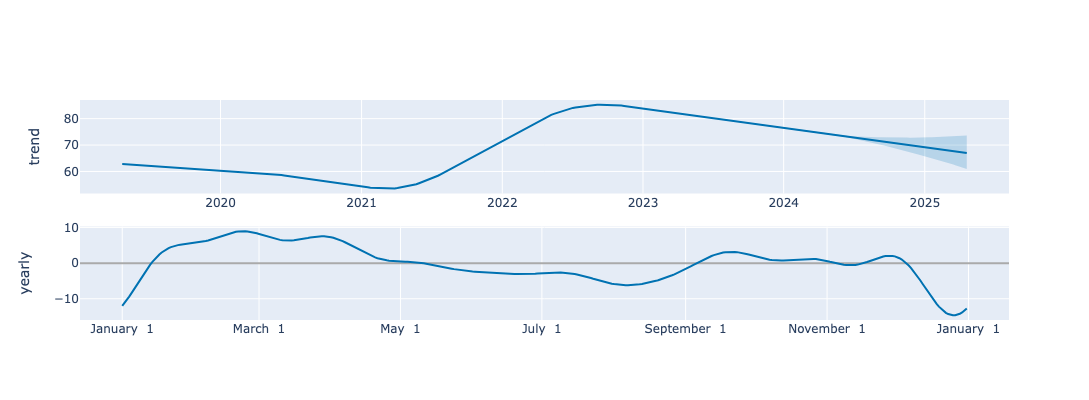

In [22]:
plot_components_plotly(m, forecast)


In [23]:
# # Plot the forecast
# fig = m.plot(forecast)

# # Change the color of the future data points
# fig.update_traces(marker_color='red', selector={'name': 'Future'})

# # Show the plot
# fig.show()

In [24]:
from prophet.plot import plot_plotly, plot_components_plotly

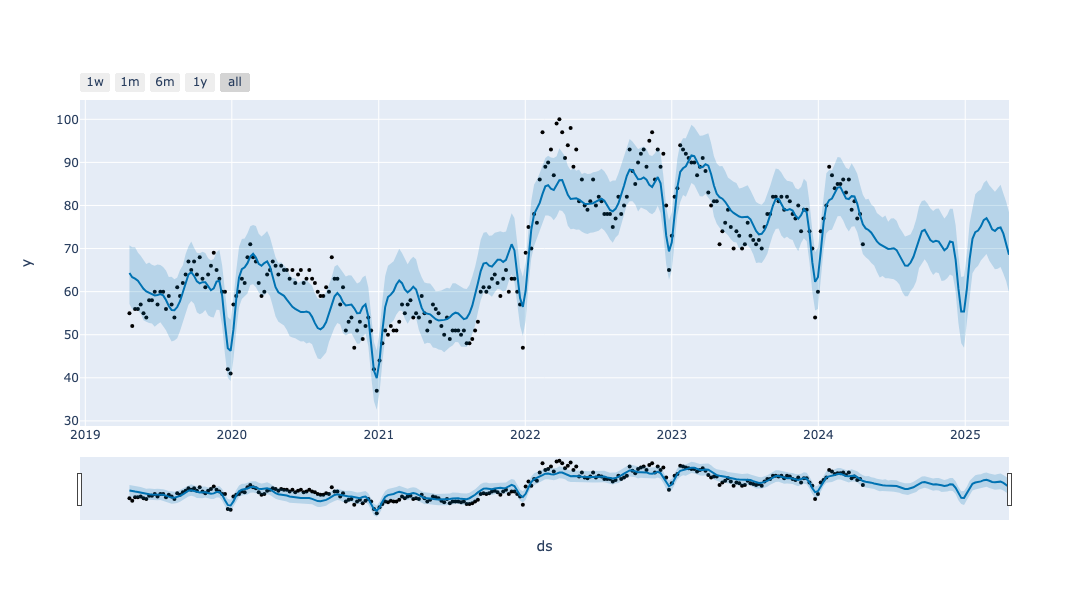

In [25]:
plot_plotly(m, forecast)

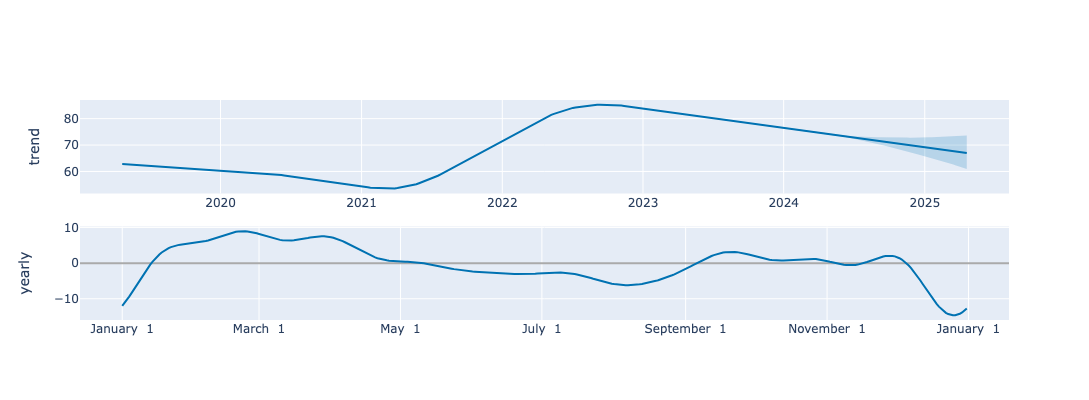

In [26]:
plot_components_plotly(m, forecast)

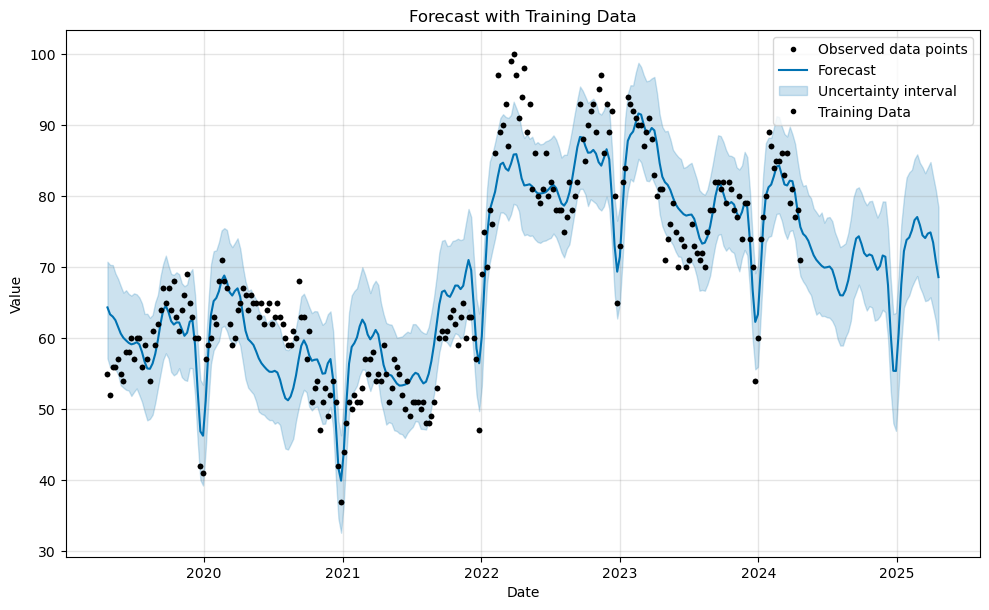

In [27]:
# Plot the forecast
fig = m.plot(forecast)

# Plot the known training data
plt.plot(test_df['ds'], test_df['y'], 'k.', label='Training Data')

# Customize the plot
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Forecast with Training Data')

plt.show()

In [28]:
# fig = m.plot(forecast, plot_color='red')
# plt.show()

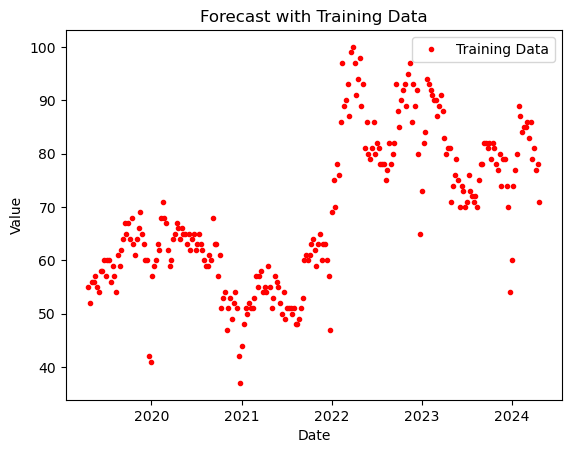

In [29]:
# Plot the known training data
plt.plot(test_df['ds'], test_df['y'], 'k.', label='Training Data')

# Customize the plot
plt.gca().get_lines()[0].set_color('red')  # Change the color of the forecasted data line to red
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Forecast with Training Data')

plt.show()

In [30]:
fig2?

Type:           Figure
String form:    Figure(900x600)
File:           /opt/anaconda3/lib/python3.11/site-packages/matplotlib/figure.py
Docstring:     
The top level container for all the plot elements.

Attributes
----------
patch
    The `.Rectangle` instance representing the figure background patch.

suppressComposite
    For multiple images, the figure will make composite images
    depending on the renderer option_image_nocomposite function.  If
    *suppressComposite* is a boolean, this will override the renderer.
Init docstring:
Parameters
----------
figsize : 2-tuple of floats, default: :rc:`figure.figsize`
    Figure dimension ``(width, height)`` in inches.

dpi : float, default: :rc:`figure.dpi`
    Dots per inch.

facecolor : default: :rc:`figure.facecolor`
    The figure patch facecolor.

edgecolor : default: :rc:`figure.edgecolor`
    The figure patch edge color.

linewidth : float
    The linewidth of the frame (i.e. the edge linewidth of the figure
    patch).

frameon :

In [31]:
plot_plotly?

Signature:
plot_plotly(
    m,
    fcst,
    uncertainty=True,
    plot_cap=True,
    trend=False,
    changepoints=False,
    changepoints_threshold=0.01,
    xlabel='ds',
    ylabel='y',
    figsize=(900, 600),
)
Docstring:
Plot the Prophet forecast with Plotly offline.

Plotting in Jupyter Notebook requires initializing plotly.offline.init_notebook_mode():
>>> import plotly.offline as py
>>> py.init_notebook_mode()
Then the figure can be displayed using plotly.offline.iplot(...):
>>> fig = plot_plotly(m, fcst)
>>> py.iplot(fig)
see https://plot.ly/python/offline/ for details

Parameters
----------
m: Prophet model.
fcst: pd.DataFrame output of m.predict.
uncertainty: Optional boolean to plot uncertainty intervals.
plot_cap: Optional boolean indicating if the capacity should be shown
    in the figure, if available.
trend: Optional boolean to plot trend
changepoints: Optional boolean to plot changepoints
changepoints_threshold: Threshold on trend change magnitude for significance.
xl

In [32]:
# plot_plotly(m, forecast, trend_color='green', uncertainty_color='blue')

In [33]:
plot_plotly?

Signature:
plot_plotly(
    m,
    fcst,
    uncertainty=True,
    plot_cap=True,
    trend=False,
    changepoints=False,
    changepoints_threshold=0.01,
    xlabel='ds',
    ylabel='y',
    figsize=(900, 600),
)
Docstring:
Plot the Prophet forecast with Plotly offline.

Plotting in Jupyter Notebook requires initializing plotly.offline.init_notebook_mode():
>>> import plotly.offline as py
>>> py.init_notebook_mode()
Then the figure can be displayed using plotly.offline.iplot(...):
>>> fig = plot_plotly(m, fcst)
>>> py.iplot(fig)
see https://plot.ly/python/offline/ for details

Parameters
----------
m: Prophet model.
fcst: pd.DataFrame output of m.predict.
uncertainty: Optional boolean to plot uncertainty intervals.
plot_cap: Optional boolean indicating if the capacity should be shown
    in the figure, if available.
trend: Optional boolean to plot trend
changepoints: Optional boolean to plot changepoints
changepoints_threshold: Threshold on trend change magnitude for significance.
xl

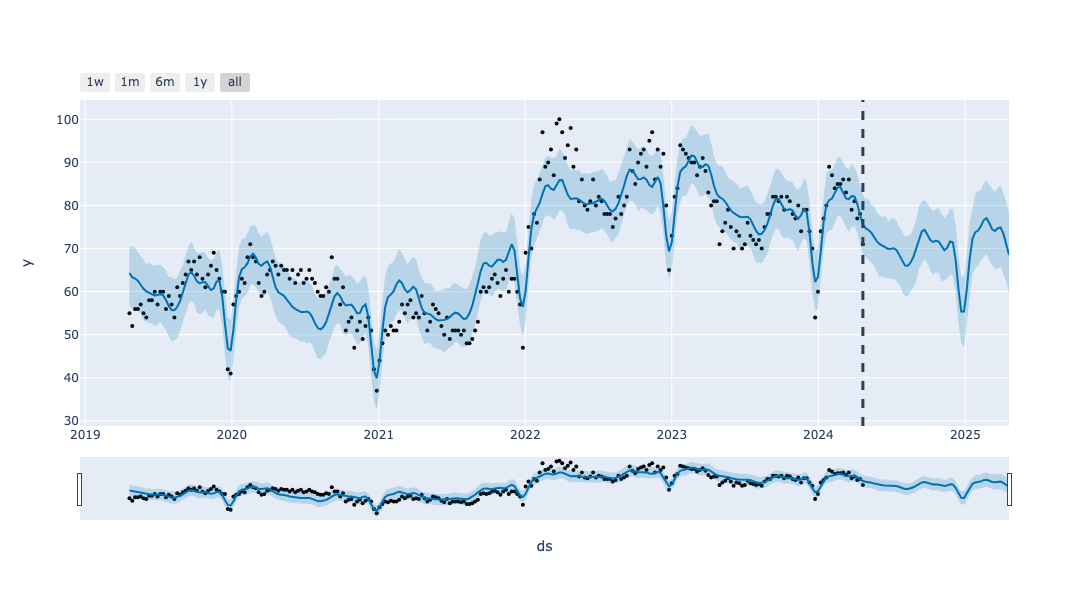

In [34]:
pfig = plot_plotly(m, forecast)
# Add a vertical line at x=2
pfig.add_vline(x='2024-04-21', line_width=3, line_dash="dash")
pfig.show()

In [35]:
pfig?

Type:            Figure
String form:    
Figure({
           'data': [{'marker': {'color': 'black', 'size': 4},
           'mode': 'markers',
           <...> },
           'type': 'date'},
           'yaxis': {'title': {'text': 'y'}}}
           })
File:            /opt/anaconda3/lib/python3.11/site-packages/plotly/graph_objs/_figure.py
Docstring:       <no docstring>
Class docstring: Base class for all figure types (both widget and non-widget)
Init docstring: 
Create a new :class:Figure instance

Parameters
----------
data
    The 'data' property is a tuple of trace instances
    that may be specified as:
      - A list or tuple of trace instances
        (e.g. [Scatter(...), Bar(...)])
      - A single trace instance
        (e.g. Scatter(...), Bar(...), etc.)
      - A list or tuple of dicts of string/value properties where:
        - The 'type' property specifies the trace type
            One of: ['bar', 'barpolar', 'box', 'candlestick',
                     'carpet', 'choropleth

In [36]:
df['MatchDt']=df['WeekDt']=='2024-04-21'

In [37]:
df

Week  Python  Java  C++     WeekDt  MatchDt
0    4/21/2019      55    55   18 2019-04-21    False
1    4/28/2019      52    50   16 2019-04-28    False
2     5/5/2019      56    56   17 2019-05-05    False
3    5/12/2019      56    61   18 2019-05-12    False
4    5/19/2019      57    56   17 2019-05-19    False
..         ...     ...   ...  ...        ...      ...
257  3/24/2024      79    47   19 2024-03-24    False
258  3/31/2024      81    51   19 2024-03-31    False
259   4/7/2024      77    45   18 2024-04-07    False
260  4/14/2024      78    48   19 2024-04-14    False
261  4/21/2024      71    42   17 2024-04-21     True

[262 rows x 6 columns]